In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [21]:
# Tải dữ liệu
df = pd.read_csv('/content/Dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
# In ra thông tin cơ bản của dữ liệu
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  peri

In [23]:
# Thống kê các thông số cơ bản của dữ liệu
print("Summary Statistics:")
df.describe()

Summary Statistics:


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [24]:
# In ra ác đặc trưng của dữ liệu
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [25]:
# Hiển thị tổng số giá trị bị thiếu trong mỗi cột của DataFrame
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

In [26]:
# Đưa dữ liệu từ dạng object về dạng số
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

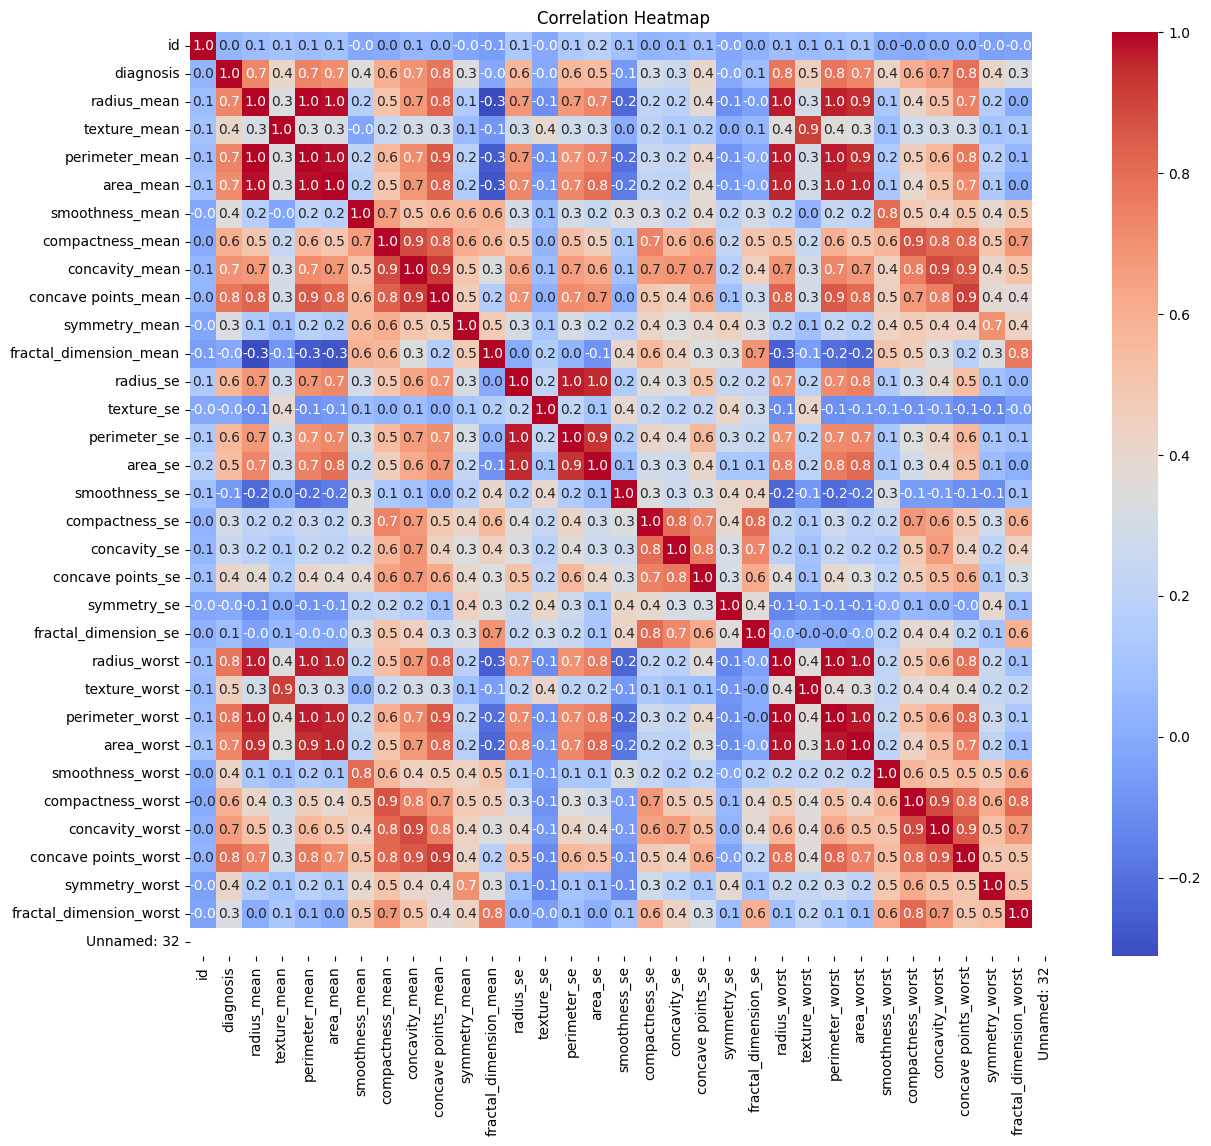

In [27]:
# Visualize
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".1f")
plt.title("Correlation Heatmap")
plt.show()

In [28]:
# Xóa cột ko cần thiết ra khỏi dataset
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [29]:
# Chia dữ liệu thành 2 tập , train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [30]:
# Huấn luyện mô hình Gausian Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train,y_train)

GaussianNB()

In [31]:
# Thực thi mô hình  Naive Bayes
print("Naive Bayes Classifier Model Performance:")

# Dự đoán mô hình
y_pred = model_nb.predict(X_test)

# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_nb:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Naive Bayes Classifier Model Performance:
Accuracy: 0.9240
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.89      0.90      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [32]:
# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
# Huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Thực thi mô hình Random Forest
print("Random Forest Classifier Model Performance:")

# Dự đoán mô hình
y_pred = rf_model.predict(X_test)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier Model Performance:
Accuracy: 0.9649
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [35]:
# Huấn luyện mô hình Logistic Regression
lg_model = LogisticRegression(max_iter=1000)
lg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
# Thực thi mô hình Logistic Regression
print("Logistic Regression Model Performance:")

# Dự đoán mô hình
y_pred = lg_model.predict(X_test)

# Accuracy
accuracy_lg = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_lg:.4f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Model Performance:
Accuracy: 0.9766
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



                 Model  Accuracy
0          Naive Bayes  0.923977
1        Random Forest  0.964912
2  Logistic Regression  0.976608


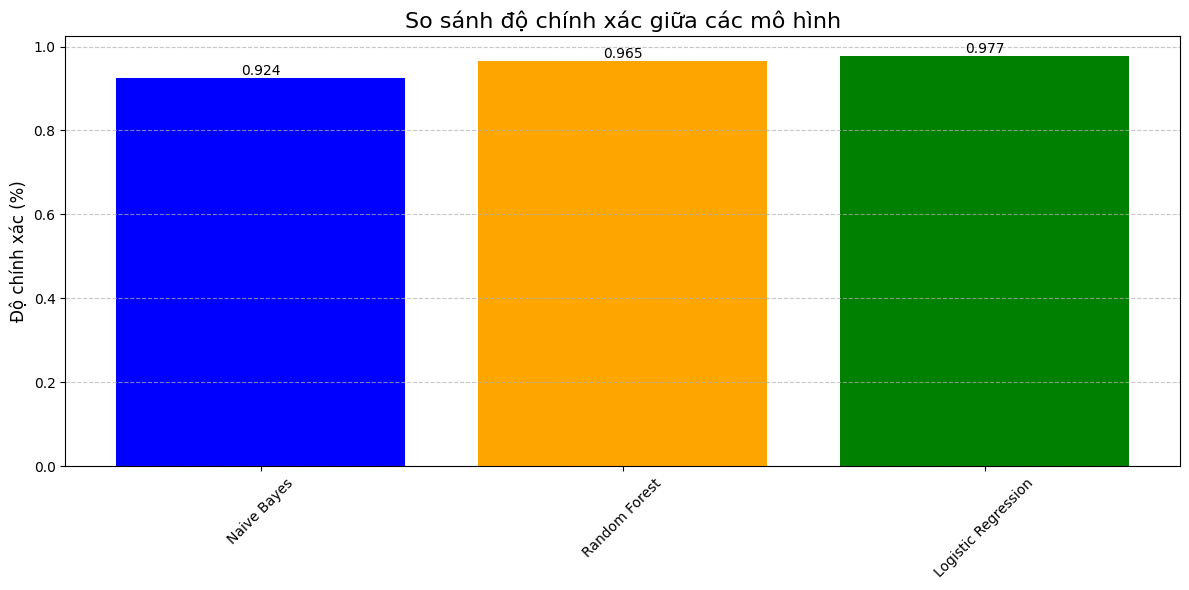

In [37]:
#Tạo biểu đồ
models = ['Naive Bayes', 'Random Forest' ,'Logistic Regression']
accuracy = [accuracy_nb ,accuracy_rf , accuracy_lg, ]

data = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
})

print(data)
# Tạo màu sắc riêng cho từng mô hình
colors = ['blue', 'orange', 'green']
plt.figure(figsize=(12, 6))
bars = plt.bar(data['Model'], data['Accuracy'], color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.3f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )
plt.title('So sánh độ chính xác giữa các mô hình', fontsize=16)
plt.ylabel('Độ chính xác (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
